In [7]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import pandas_datareader as pdr
from sklearn.ensemble import RandomForestClassifier

모델 예측의 결과는 ‘상승/보합/하락’의 3가지 투자의견으로 나
타난다. KOSPI의 미래 3개월 수익률에 대해 4% 이상을 기대하면 ‘상승’ 의견, 4%~0% 사이를 기
대하면 ‘보합’ 의견, 0% 미만을 기대하면 ‘하락’ 의견을 제시하는 방식이다. 


# 피처 종류 
- 원,달러환율(월) (Finance DataReader)
- ESI 경제 심리지수(ECOS)
- VKOSPI (invesing.com)
- VIX (invesing.com)
- WTI 유가 (pandas_datareader)
- 수출 증가율

In [8]:
# 유가 데이터 가져오기
# 서부 텍사스 중질유(WTI Crude), monthly
df_oil = pdr.DataReader('POILDUBUSDM', 'fred', start='2003-01-01')

df_oil.tail(10)
df_oil.columns = ["WTI"]
df_oil

,WTI
DATE,
2003-01-01,27.881304
2003-02-01,30.200500
2003-03-01,27.521429
2003-04-01,23.558182
2003-05-01,24.317273
...,...
2023-06-01,74.729545
2023-07-01,80.645714
2023-08-01,86.123043


In [9]:
# 환율 데이터 들고오기

df_ex = fdr.DataReader("USD/KRW","2003-01-01","2023-07-31")
df_ex = df_ex[["Close"]]
df_ex= df_ex.rename(columns={'Close':'환율종가'}) 
df_ex

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# 경제 심리지수 데이터
df_esi = pd.read_csv("./경제심리지수_2003.csv")
#df_esi = df_esi[["경제심리지수(원계열)"]]
#df_esi = df_esi.diff()
df_esi["Date"] = pd.to_datetime(df_esi["Date"])
df_esi.set_index('Date',inplace=True)
df_esi= df_esi.rename(columns={'경제심리지수(원계열)':'ESI'}) 
df_esi

,ESI,경제심리지수(순환변동치)
Date,,
2003-01-01,101.0,95.7
2003-02-01,102.3,95.6
2003-03-01,92.3,95.6
2003-04-01,98.0,95.9
2003-05-01,96.1,96.5
...,...,...
2023-03-01,91.5,92.2
2023-04-01,93.8,92.4
2023-05-01,94.2,92.9


In [ ]:
# 수출입 데이터 전월 대비 증가율 사용 
df_export = pd.read_excel("./수출입 증가표.xlsx")
df_export= df_export.rename(columns={'Unnamed: 0':'Date'})  
import pandas as pd

# Excel 파일 읽기
df_export = pd.read_excel("./수출입 증가표.xlsx")

# 컬럼 이름 변경
df_export = df_export.rename(columns={'Unnamed: 0': 'Date'})

# 날짜 형식 정의 (예: "200301월" -> 2020년 3월)
def custom_date_parser(date_str):
    year = int(date_str[:4])
    month_str = date_str[4:-1]  # "월" 제거
    month = int(month_str)
    return pd.to_datetime(f"{year}-{month:02d}")

# "Date" 열의 데이터를 날짜로 변환
df_export["Date"] = df_export["Date"].apply(custom_date_parser)

df_export.set_index('Date',inplace=True)

df_export = df_export[["수출"]]

df_export["수출증가율"] = df_export["수출"].pct_change()

df_export


,수출,수출증가율
Date,,
2003-01-01,143,NaN
2003-02-01,133,-0.069930
2003-03-01,154,0.157895
2003-04-01,157,0.019481
2003-05-01,147,-0.063694
...,...,...
2023-02-01,500,0.077586
2023-03-01,549,0.098000
2023-04-01,495,-0.098361


In [ ]:
# vix 지수
df_vix = pd.read_csv("./CBOE Volatility Index 과거 데이터.csv")
df_vix["Date"] = pd.to_datetime(df_vix["날짜"])
df_vix.set_index('Date',inplace=True)

df_vix = df_vix[["종가"]]
df_vix = df_vix.rename(columns={'종가': 'vix'})
df_vix

,vix
Date,
2023-07-01,13.63
2023-06-01,13.59
2023-05-01,17.94
2023-04-01,15.78
2023-03-01,18.70
...,...
2003-05-01,19.47
2003-04-01,21.21
2003-03-01,29.15


In [ ]:
# vkospi 
df_vkospi = pd.read_csv("./KOSPI Volatility 과거 데이터.csv")
df_vkospi["Date"] = pd.to_datetime(df_vkospi["날짜"])
df_vkospi.set_index('Date',inplace=True)
df_vkospi = df_vkospi[["종가"]]
df_vkospi = df_vkospi.rename(columns={'종가': 'vkospi'})
df_vkospi

,vkospi
Date,
2023-07-01,14.21
2023-06-01,12.59
2023-05-01,14.80
2023-04-01,14.51
2023-03-01,15.57
...,...
2009-09-01,22.85
2009-08-01,23.97
2009-07-01,25.62


In [ ]:
# 월말 데이터로 변경
df_oil  = df_oil.resample('M').last()
df_ex  = df_ex.resample('M').last()
df_esi  = df_esi.resample('M').last()
df_export  = df_export.resample('M').last()
df_vix  = df_vix.resample('M').last()
df_vkospi  = df_vkospi.resample('M').last()

In [ ]:
df_list = [df_oil,df_ex,df_esi["ESI"],df_export["수출증가율"],df_vix, df_vkospi]

In [ ]:
# 데이터 결합
df_all = pd.concat(df_list,axis=1)
df_all.dropna(inplace=True)
df_all

,WTI,환율종가,ESI,수출증가율,vix,vkospi
2009-05-31,57.332857,1250.099976,95.6,-0.082508,28.92,33.42
2009-06-30,67.853636,1272.599976,98.9,0.158273,26.35,27.26
2009-07-31,65.522174,1223.099976,99.7,-0.009317,25.92,25.62
2009-08-31,71.755714,1249.500000,108.2,-0.090909,26.01,23.97
2009-09-30,67.546818,1173.699951,109.5,0.168966,25.61,22.85
...,...,...,...,...,...,...
2023-02-28,81.275000,1318.349976,91.6,0.077586,20.70,18.53
2023-03-31,78.270870,1296.500000,91.5,0.098000,18.70,15.57
2023-04-30,83.408500,1339.390015,93.8,-0.098361,15.78,14.51
2023-05-31,74.789130,1319.790039,94.2,0.052525,17.94,14.80


In [ ]:
# 코스피 데이터 가져오기
df_kospi = fdr.DataReader("KS11","2009","2023-06-30")
df_kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,1132.869995,1157.400024,1118.839966,1157.400024,1157.400024,340800.0
2009-01-05,1180.979980,1185.219971,1166.660034,1173.569946,1173.569946,414800.0
2009-01-06,1183.520020,1203.589966,1179.939941,1194.280029,1194.280029,444200.0
2009-01-07,1198.849976,1228.560059,1195.199951,1228.170044,1228.170044,568600.0
2009-01-08,1212.699951,1218.430054,1195.150024,1205.699951,1205.699951,472300.0
...,...,...,...,...,...,...
2023-06-23,2599.040039,2600.810059,2568.070068,2570.100098,2570.100098,526500.0
2023-06-26,2568.649902,2585.310059,2562.030029,2582.199951,2582.199951,479200.0
2023-06-27,2581.020020,2582.000000,2568.520020,2581.389893,2581.389893,535400.0


In [ ]:
# 월말로 변경
df_kospi  = df_kospi.resample('M').last()
df_kospi["월수익률"] = df_kospi["Close"].pct_change()
df_kospi

,Open,High,Low,Close,Adj Close,Volume,월수익률
Date,,,,,,,
2009-01-31,1147.569946,1163.760010,1144.520020,1162.109985,1162.109985,377000.0,NaN
2009-02-28,1056.709961,1076.810059,1048.050049,1063.030029,1063.030029,498300.0,-0.085259
2009-03-31,1205.979980,1228.209961,1203.160034,1206.260010,1206.260010,503600.0,0.134737
2009-04-30,1353.670044,1377.819946,1350.459961,1369.359985,1369.359985,811800.0,0.135211
2009-05-31,1393.250000,1398.439941,1380.680054,1395.890015,1395.890015,549700.0,0.019374
...,...,...,...,...,...,...,...
2023-02-28,2417.580078,2431.669922,2407.290039,2412.850098,2412.850098,529200.0,-0.005043
2023-03-31,2459.939941,2481.239990,2456.540039,2476.860107,2476.860107,721300.0,0.026529
2023-04-30,2511.790039,2517.129883,2489.580078,2501.530029,2501.530029,776400.0,0.009960


In [ ]:
# 범위 설정 
# 수익률에 따른 투자 의견 매핑 함수
def map_to_opinion(return_value):
    if return_value >= 0.03:
        return 2  # 상승 의견
    elif 0 <= return_value < 0.03:
        return 1  # 보합 의견
    else:
        return 0  # 하락 의견

# 투자 의견 생성
opinions = list(map(map_to_opinion, df_kospi["월수익률"]))

# 결과 출력
df_kospi["월수익률"] = opinions
df_kospi

,Open,High,Low,Close,Adj Close,Volume,월수익률
Date,,,,,,,
2009-01-31,1147.569946,1163.760010,1144.520020,1162.109985,1162.109985,377000.0,0
2009-02-28,1056.709961,1076.810059,1048.050049,1063.030029,1063.030029,498300.0,0
2009-03-31,1205.979980,1228.209961,1203.160034,1206.260010,1206.260010,503600.0,2
2009-04-30,1353.670044,1377.819946,1350.459961,1369.359985,1369.359985,811800.0,2
2009-05-31,1393.250000,1398.439941,1380.680054,1395.890015,1395.890015,549700.0,1
...,...,...,...,...,...,...,...
2023-02-28,2417.580078,2431.669922,2407.290039,2412.850098,2412.850098,529200.0,0
2023-03-31,2459.939941,2481.239990,2456.540039,2476.860107,2476.860107,721300.0,1
2023-04-30,2511.790039,2517.129883,2489.580078,2501.530029,2501.530029,776400.0,1


In [ ]:
df_all["코스피_position(3개월 후)"] = df_kospi["월수익률"].shift(-3)
df_all.dropna(inplace=True)
df_all

,WTI,환율종가,ESI,수출증가율,vix,vkospi,코스피_position(3개월 후)
2009-05-31,57.332857,1250.099976,95.6,-0.082508,28.92,33.42,1.0
2009-06-30,67.853636,1272.599976,98.9,0.158273,26.35,27.26,2.0
2009-07-31,65.522174,1223.099976,99.7,-0.009317,25.92,25.62,0.0
2009-08-31,71.755714,1249.500000,108.2,-0.090909,26.01,23.97,0.0
2009-09-30,67.546818,1173.699951,109.5,0.168966,25.61,22.85,2.0
...,...,...,...,...,...,...,...
2022-11-30,84.599091,1325.369995,91.2,-0.011450,20.58,17.78,0.0
2022-12-31,76.855909,1260.260010,91.5,0.057915,21.67,18.40,1.0
2023-01-31,80.905000,1231.500000,90.1,-0.153285,19.40,17.75,1.0
2023-02-28,81.275000,1318.349976,91.6,0.077586,20.70,18.53,2.0


In [ ]:
df_all["코스피_position(3개월 후)"].value_counts()

0.0    71
1.0    53
2.0    43
Name: 코스피_position(3개월 후), dtype: int64

In [ ]:
# train set, test set 분리
train = df_all[:137]
test = df_all[-30:]

X_train = train.drop("코스피_position(3개월 후)",axis=1)
y_train = train["코스피_position(3개월 후)"]
X_test = test.drop("코스피_position(3개월 후)",axis=1)
y_test = test["코스피_position(3개월 후)"]

In [ ]:
# 라이브러리 불러오기
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.metrics as mt 
from sklearn.tree import export_graphviz 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import confusion_matrix 


In [ ]:
# 최적하이퍼 파라미터 찾기
rnd_clf = RandomForestClassifier() 
 
param_dist_rf = { 
 'n_estimators':[50, 100, 500], 
 'max_leaf_nodes':[20, 30, 40, 50], 
 'max_features':[2, 4, 6, 8] 
} 
 
rnd_search = RandomizedSearchCV(rnd_clf, param_dist_rf, cv=10, random_state=42) 
rnd_search.fit(X_train, y_train) 
print(rnd_search.best_params_) 

{'n_estimators': 100, 'max_leaf_nodes': 30, 'max_features': 2}


In [ ]:
# 5. 학습 및 K-fold cross_validation 평가 
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=30, max_features=2, n_jobs=-1, 
random_state=42) #디폴트
rnd_scores = cross_val_score(rnd_clf, X_train, y_train, scoring="accuracy", cv=5) 
print("\n<10-fold cross-validation>") 
print("accuracy score mean: ", rnd_scores.mean()) 



<10-fold cross-validation>
accuracy score mean:  0.29894179894179895


In [ ]:
# 6. 최종 모델 학습
rnd_clf.fit(X_train, y_train) 
print("\n<AI model: machine learning done >") 
print("accuracy_score of train data(0.8 of sample): ", rnd_clf.score(X_train, y_train)) 



<AI model: machine learning done >
accuracy_score of train data(0.8 of sample):  0.9927007299270073


In [ ]:
# 7. test data 확인
print("accuracy_score of test data(0.2 of sample): ", rnd_clf.score(X_test, y_test)) 
y_test_pred = rnd_clf.predict(X_test) 
print("accuracy_score of test data: ", mt.accuracy_score(y_test, y_test_pred)) 


accuracy_score of test data(0.2 of sample):  0.4
accuracy_score of test data:  0.4


In [ ]:
# 8. confusion matrix 확인
y_test_pred = rnd_clf.predict(X_test) 
cm1= confusion_matrix(y_test, y_test_pred, labels=[2,1,0]) 
print("\n<Confusion matrix>") 
print("(of test)") 
print("up","neutral","down") 
print(cm1) 



<Confusion matrix>
(of test)
up neutral down
[[2 0 5]
 [5 1 4]
 [2 2 9]]


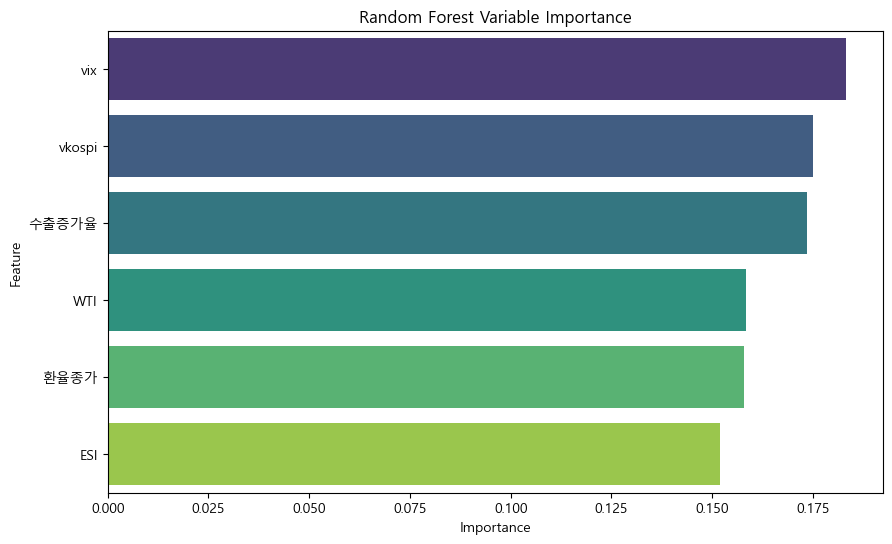

In [ ]:
import seaborn as sns
import warnings
# 한글 폰트 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

importances =  rnd_clf.feature_importances_

# 변수 중요도를 데이터프레임으로 변환하여 시각화
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Random Forest Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()